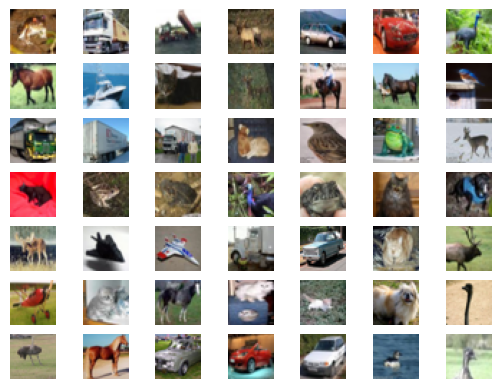

In [8]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot

(trainX, trainy), (testX, testy) = load_data()
for i in range(49):
  pyplot.subplot(7,7,i+1)
  pyplot.axis('off')
  pyplot.imshow(trainX[i])
pyplot.show()

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import numpy as np

In [10]:
def define_discriminator(in_shape=(32,32,3)):
    model = Sequential()
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))


    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

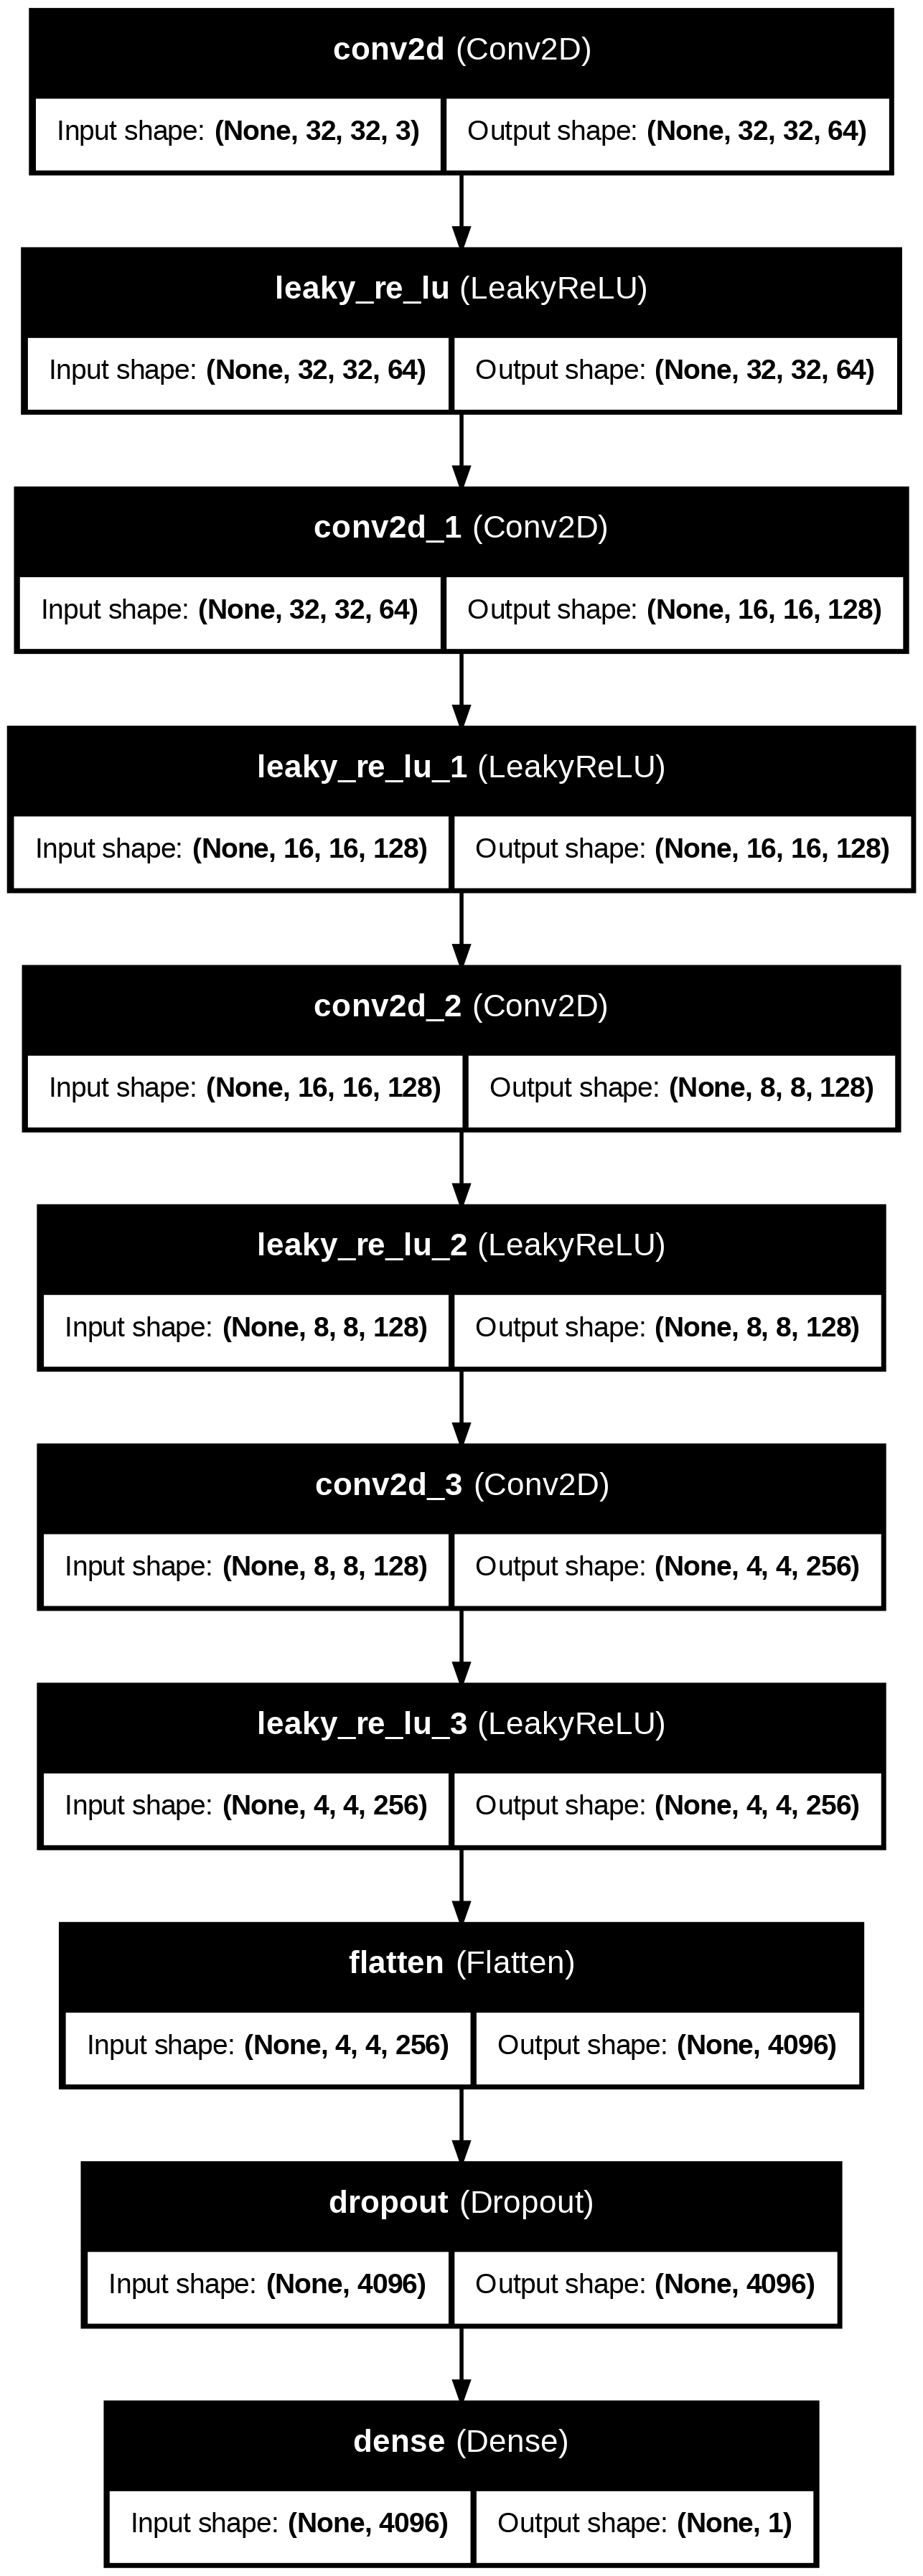

In [11]:
model=define_discriminator()
model.summary()

plot_model(model,to_file='discriminator.png',show_shapes=True,show_layer_names=True)

In [12]:
def load_real_samples():
  (trainX, _), (_, _) = load_data()
  X = trainX.astype('float32')
  #scale from [0,255] to [-1,1]
  X = (X - 127.5) / 127.5
  return X

In [13]:
X=load_real_samples()
print(X.shape)
X[0]

(50000, 32, 32, 3)


array([[[-0.5372549 , -0.5137255 , -0.5058824 ],
        [-0.6627451 , -0.6392157 , -0.64705884],
        [-0.60784316, -0.62352943, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215687, -0.01960784, -0.2       ],
        [ 0.16078432, -0.02745098, -0.19215687]],

       [[-0.8745098 , -0.84313726, -0.84313726],
        [-1.        , -1.        , -1.        ],
        [-0.85882354, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980393, -0.5686275 ],
        [-0.06666667, -0.34901962, -0.60784316],
        [-0.04313726, -0.31764707, -0.5529412 ]],

       [[-0.8039216 , -0.8117647 , -0.8352941 ],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.6156863 , -0.7882353 , -0.9372549 ],
        ...,
        [-0.07450981, -0.34117648, -0.60784316],
        [-0.05882353, -0.34117648, -0.60784316],
        [-0.14509805, -0.42745098, -0.67058825]],

       ...,

       [[ 0.6313726 ,  0.33333334, -0.24705882],
        [ 0

In [14]:
def generate_real_samples(dataset, n_samples):
  ix = np.random.randint(0, dataset.shape[0], n_samples)
  X = dataset[ix]
  y = np.ones((n_samples, 1))
  return X, y

In [15]:
X,y =generate_real_samples(X,64)
print(X.shape,y.shape)
print(y)

(64, 32, 32, 3) (64, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [16]:
def generate_fake_samples(n_samples):
  X = np.random.rand(32*32*3*n_samples)
  X=-1+X*2
  X = X.reshape((n_samples, 32, 32, 3))
  y = np.zeros((n_samples, 1))
  return X, y

In [17]:
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
  half_batch=int(n_batch/2)

  for i in range(n_iter):
    X_real, y_real = generate_real_samples(dataset, half_batch)
    _, real_acc = model.train_on_batch(X_real, y_real)

    X_fake, y_fake = generate_fake_samples(half_batch)
    _, fake_acc = model.train_on_batch(X_fake, y_fake)

    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [18]:
model=define_discriminator()
dataset=load_real_samples()
train_discriminator(model,dataset)

>1 real=77% fake=38%


>2 real=58% fake=44%


>3 real=55% fake=49%
>4 real=56% fake=54%
>5 real=59% fake=62%
>6 real=65% fake=67%
>7 real=69% fake=71%
>8 real=73% fake=74%
>9 real=75% fake=77%
>10 real=77% fake=78%
>11 real=79% fake=80%
>12 real=81% fake=81%
>13 real=82% fake=83%
>14 real=83% fake=84%
>15 real=84% fake=85%
>16 real=85% fake=86%
>17 real=86% fake=86%
>18 real=87% fake=87%
>19 real=87% fake=88%
>20 real=88% fake=88%


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Reshape
from keras.layers import Dense
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model

In [20]:
def define_generator(latent_dim):
  model = Sequential()

  n_nodes = 256 * 4 * 4
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4,4,256)))

  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
  return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 4096)                │         413,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 3)           │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

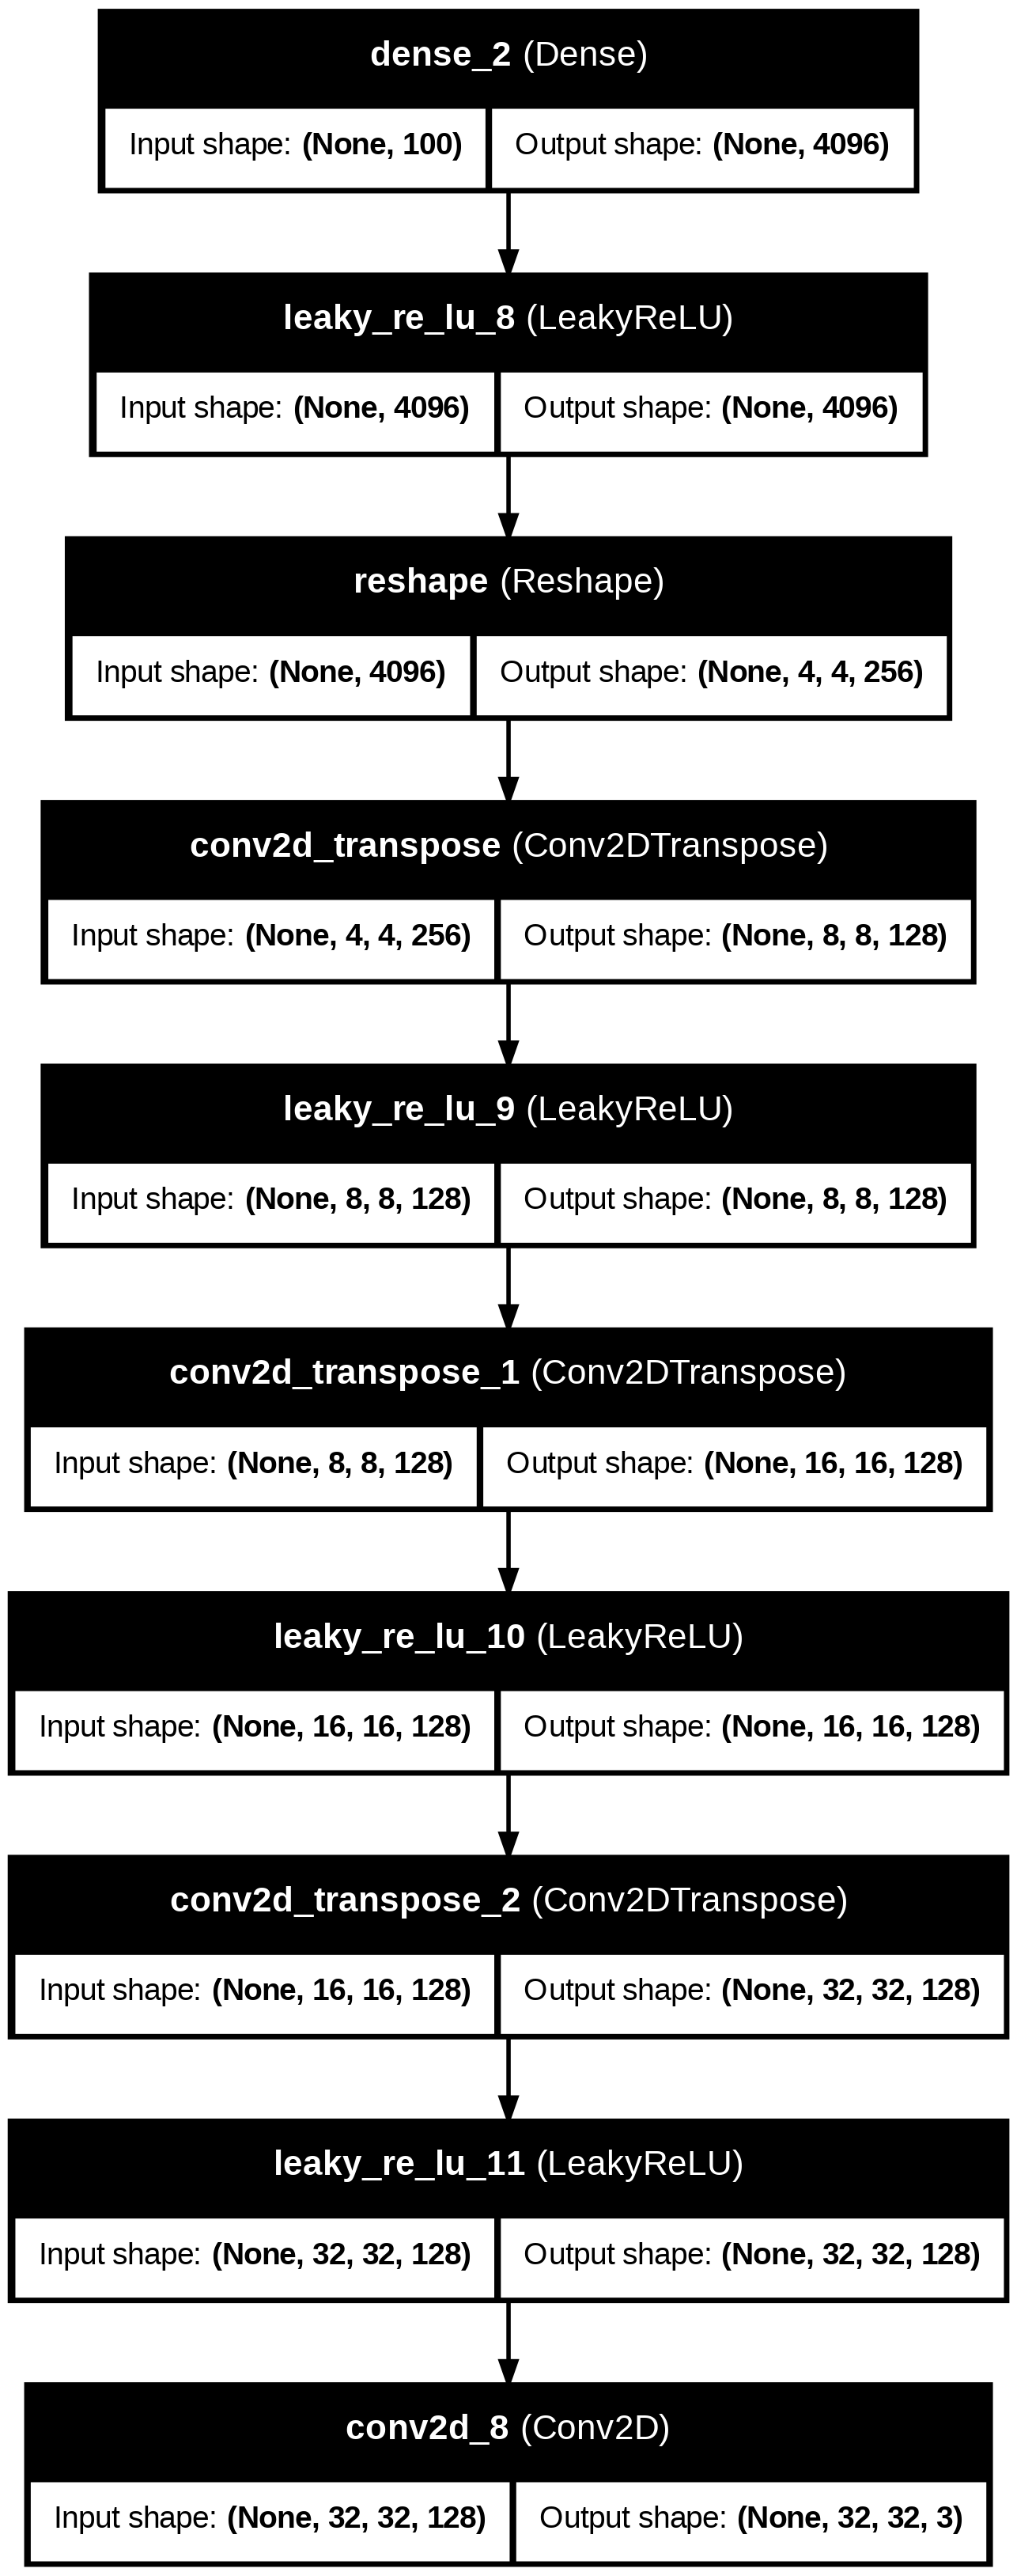

In [21]:
latent_dim=100
model=define_generator(latent_dim)
model.summary()
plot_model(model,to_file='generator_plot.png',show_shapes=True,show_layer_names=True)

In [22]:
def generator_latent_points(latent_dim, n_samples):
  x_input = np.random.rand(latent_dim * n_samples)
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [23]:
def generator_fake_samples( latent_dim, n_samples):
  x_input = random.randn(latent_dim * n_samples)
  x_input = x_input.reshape(n_samples, latent_dim)
  return X, y

In [24]:
x_input=generator_latent_points(100,64)
print(x_input.shape)

(64, 100)


In [25]:
def generate_fake_samples(g_model, latent_dim, n_samples):
  x_input = generator_latent_points(latent_dim, n_samples)
  X = g_model.predict(x_input)
  y = np.zeros((n_samples, 1))
  return X, y

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


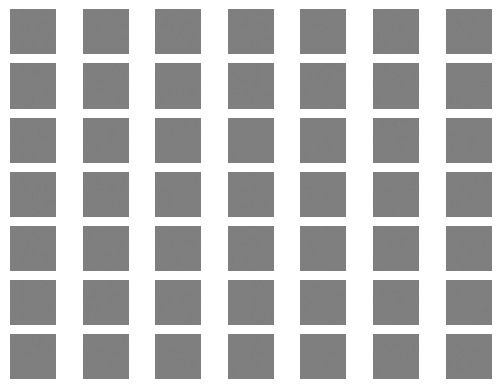

(49, 32, 32, 3) (64, 1)


In [26]:
latent_dim=100
model=define_generator(latent_dim)
n_samples=49

X,_=generate_fake_samples(model,latent_dim,n_samples)

X=(X+1)/2.0

for i in range(n_samples):
  pyplot.subplot(7,7,i+1)
  pyplot.axis('off')
  pyplot.imshow(X[i])
pyplot.show()
print(X.shape,y.shape)

In [27]:
def define_gan(g_model, d_model):
  d_model.trainable = False
  model = Sequential()
  model.add(g_model)
  model.add(d_model)

  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)            │ (None, 32, 32, 3)           │       1,466,115 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_4 (Sequential)            │ (None, 1)                   │         522,497 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,988,612 (7.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 522,497 (1.99 MB)

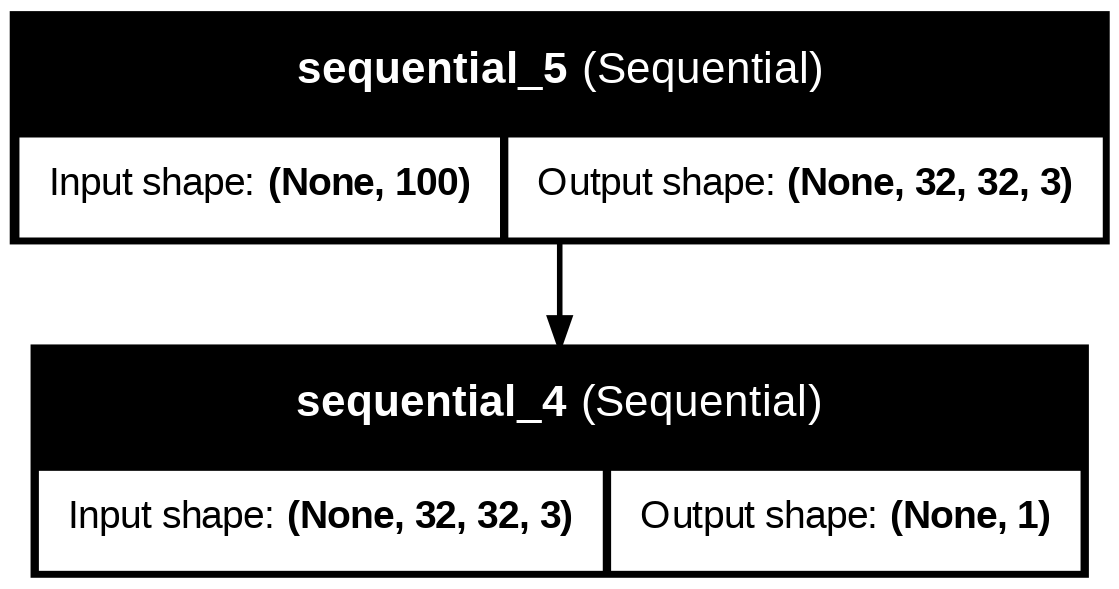

In [28]:
latent_dim=100
d_model=define_discriminator()
g_model=define_generator(latent_dim)
gan_model=define_gan(g_model,d_model)
gan_model.build(input_shape=(None, latent_dim))

gan_model.summary()

plot_model(gan_model,to_file='gan_plot.png',show_shapes=True,show_layer_names=True)

In [29]:
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=200,n_batch=128):
  bat_per_epo=int(dataset.shape[0]/n_batch)
  half_batch=int(n_batch/2)

  for i in range(n_epochs):
    for j in range(bat_per_epo):
      X_real,y_real=generate_real_samples(dataset,half_batch)
      d_loss1,_=d_model.train_on_batch(X_real,y_real)
      # Assuming d_loss1 is a list, extract the first element
      d_loss1 = d_loss1[0] if isinstance(d_loss1, list) else d_loss1

      X_fake,y_fake=generate_fake_samples(g_model,latent_dim,half_batch)
      d_loss2,_=d_model.train_on_batch(X_fake,y_fake)
      # Assuming d_loss2 is a list, extract the first element
      d_loss2 = d_loss2[0] if isinstance(d_loss2, list) else d_loss2

      X_gan=generator_latent_points(latent_dim,n_batch)
      y_gan=np.ones((n_batch,1))

      g_loss=gan_model.train_on_batch(X_gan,y_gan)
      # Assuming g_loss is a list, extract the first element
      g_loss = g_loss[0] if isinstance(g_loss, list) else g_loss

      print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
       (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))

    if (i+1)%10==0:
      summarize_performance(i,g_model,d_model,dataset,latent_dim)

In [30]:
def summarize_performance(epoch,g_model,d_model,dataset,latent_dim,n_samples=150):
  X_real,y_real=generate_real_samples(dataset,n_samples)
  _,acc_real=d_model.evaluate(X_real,y_real,verbose=0)

  x_fake,y_fake=generate_fake_samples(g_model,latent_dim,n_samples)
  _,acc_fake=d_model.evaluate(x_fake,y_fake,verbose=0)

  print('Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100,acc_fake*100))

  save_plot(x_fake,epoch)
  filename='generator_model_%03d.h5' % (epoch+1)
  g_model.save(filename)

In [31]:
def save_photo(examples,epoch,n=7):
  examples=(examples+1)/2.0
  for i in range(examples.shape[0]):
    pyplot.subplot(7,7,i+1)
    pyplot.axis('off')
    pyplot.imshow(examples[i])
  filename='generated_plot_e%03d.png' % (epoch+1)
  pyplot.savefig(filename)
  pyplot.close()

In [ ]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=2, n_batch=128)

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
>1, 1/390, d1=0.677, d2=0.685 g=0.685
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1, 2/390, d1=0.681, d2=0.685 g=0.685
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
>1, 3/390, d1=0.683, d2=0.685 g=0.685
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
>1, 4/390, d1=0.684, d2=0.686 g=0.686
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1, 5/390, d1=0.685, d2=0.687 g=0.687
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1, 6/390, d1=0.685, d2=0.687 g=0.687
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
>1, 7/390, d1=0.687, d2=0.689 g=0.689
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1, 8/390, d1=0.688, d2=0.691 g=0.691
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1, 9/390, d1=0.690, d2=0.693 g=0.693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1, 10/390, d1=0.692, d2=0.696 g=0.696
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1, 11/390, d1=0.695, d2=0.701 g=0.701
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1, 12/390, d1=0.700, d2=0.706 g=0.706
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
>1, 13/390, d1=0.704, d2=0.711 g=0.711
2/2 ━━━